In [1]:

from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage.color import rgb2gray,rgb2hsv
from skimage.filters import threshold_otsu, rank
from skimage.morphology import disk
from skimage.filters import gaussian
from skimage.filters import median
from skimage import data
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
import matplotlib
import matplotlib.pyplot as plt
import cv2
from cv2 import threshold 
from collections import Counter 


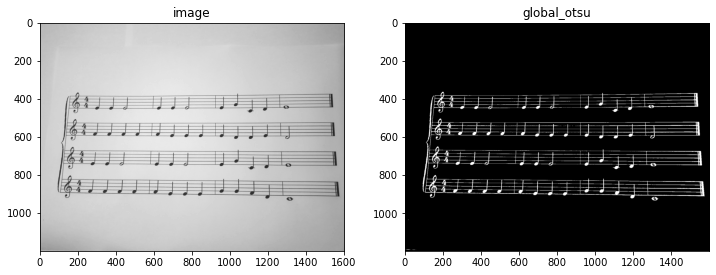

In [70]:
def binarize(img):
    threshold_global_otsu = threshold_otsu(img)
    global_otsu = img < threshold_global_otsu
    return global_otsu

img = io.imread('test.jpg', as_gray = True) 

binary_img = np.ones(img.shape)
L = img.shape[0]
W = img.shape[1]
HL = img.shape[0]//2
HW = img.shape[1]//2

binary_img[0:HL, 0:HW] = binarize(img[0:HL, 0:HW])
binary_img[0:HL, HW:W] = binarize(img[0:HL, HW:W])
binary_img[HL:L, 0:HW] = binarize(img[HL:L, 0:HW])
binary_img[HL:L, HW:W] = binarize(img[HL:L, HW:W])

show_images([image,binary_img],['image','global_otsu'])




In [71]:
def get_ref_lengths(img):
    num_rows = img.shape[0]  # Image Height (number of rows)
    num_cols = img.shape[1]  # Image Width (number of columns)
    rle_image_white_runs = []  # Cumulative white run list
    rle_image_black_runs = []  # Cumulative black run list
    sum_all_consec_runs = []  # Cumulative consecutive black white runs

    for i in range(num_cols):
        col = img[:, i]
        rle_col = []
        rle_white_runs = []
        rle_black_runs = []
        run_val = 0  # (The number of consecutive pixels of same value)
        run_type = col[0]  # Should be 255 (white) initially
        for j in range(num_rows):
            if (col[j] == run_type):
                # increment run length
                run_val += 1
            else:
                # add previous run length to rle encoding
                rle_col.append(run_val)
                if (run_type == 1):
                    rle_black_runs.append(run_val)
                else:
                    rle_white_runs.append(run_val)

                # alternate run type
                run_type = col[j]
                # increment run_val for new value
                run_val = 1

        # add final run length to encoding
        rle_col.append(run_val)
        if (run_type == 1):
            rle_black_runs.append(run_val)
        else:
            rle_white_runs.append(run_val)

        # Calculate sum of consecutive vertical runs
        sum_rle_col = [sum(rle_col[i: i + 2]) for i in range(len(rle_col))]

        # Add to column accumulation list
        rle_image_white_runs.extend(rle_white_runs)
        rle_image_black_runs.extend(rle_black_runs)
        sum_all_consec_runs.extend(sum_rle_col)
    
    white_runs = Counter(rle_image_white_runs)
    black_runs = Counter(rle_image_black_runs)
    black_white_sum = Counter(sum_all_consec_runs)

    line_spacing = white_runs.most_common(1)[0][0]
    line_width = black_runs.most_common(1)[0][0]
    width_spacing_sum = black_white_sum.most_common(1)[0][0]

    print(line_width,line_spacing )
    return line_width, line_spacing

get_ref_lengths(binary_img)

2 15


(2, 15)